In [1]:
import os
import matplotlib.pyplot as plt
import utils

In [2]:
moon_dir = './output/moon'
moon_log = utils.load_pickle(os.path.join(moon_dir, 'performance_log.pickle'))


fl_dir = './output/federated_multi_class/'
fl_log = utils.load_pickle(os.path.join(fl_dir, 'performance_log.pickle'))


In [3]:
acc_plot_config = utils.ACC_PLOT_CONFIG.copy()
acc_plot_config

{'attributes': ('train_acc', 'valid_acc'),
 'labels': ('train', 'valid'),
 'title': 'Accuracy',
 'xlabel': 'rounds',
 'ylabel': 'accuracy',
 'save_dir': None,
 'show_img': False}

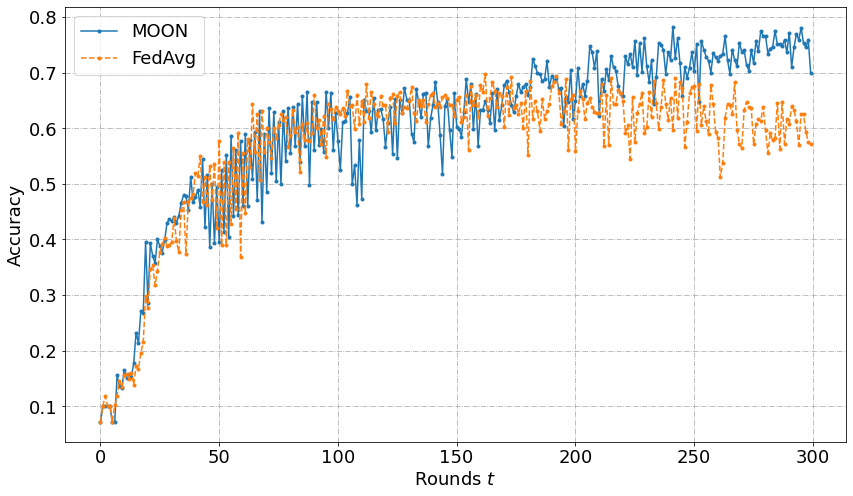

In [117]:
plt.rc('legend', fontsize=18)

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(14,8))
plt.plot(moon_log['valid_acc'][:300], label='MOON', linestyle='-', marker='.')
plt.plot(fl_log['valid_acc'][:300], label='FedAvg', linestyle='--', marker='.')
# plt.title('Accuracy')
plt.xlabel('Rounds $t$', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.grid(True, linestyle='-.')
plt.legend()
plt.savefig('./accuracy.png', dpi=300, bbox_inches='tight')


In [78]:
data_dir = './data/'
client_data_dir = os.path.join(data_dir, 'client_data')
class_lables = os.listdir(os.path.join(data_dir,'train_sub'))
class_lables.sort()
class_lables

# x, y, n = 


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy']

In [111]:
num_clients = 8
x, y, n = [], [], []
for idx in range(num_clients):
    client_dir = os.path.join(client_data_dir, 'client_{}'.format(idx))
    for label in class_lables:
        class_dir = os.path.join(client_dir, label)
        if os.path.exists(class_dir):
            n.append((1*len(os.listdir(class_dir)))**1)
        else:
            n.append(0)
        y.append(label)
        x.append(idx)

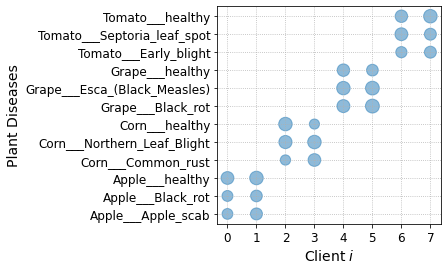

In [118]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.figure(figsize=(4,4))

plt.scatter(x, y, s=n, alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+1, 1.0), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Client $i$')
plt.ylabel('Plant Diseases')
plt.grid(linestyle=':')
plt.savefig('client_data_amount.png', dpi=300, bbox_inches='tight')
plt.show()